In [58]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn import preprocessing 
from sklearn import linear_model 
sb.set() # set the default Seaborn style for graphics

In [59]:
game_data = pd.read_csv('games_updated.csv')
game_data

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,12/3/2022,22101005,Final,Miami Heat,Minnesota Timberwolves,2021,Miami Heat,104.0,0.398,0.760,...,23.0,53.0,Minnesota Timberwolves,113.0,0.422,0.875,0.357,21.0,46.0,0
1,12/3/2022,22101006,Final,Chicago Bulls,Cleveland Cavaliers,2021,Chicago Bulls,101.0,0.443,0.933,...,20.0,46.0,Cleveland Cavaliers,91.0,0.419,0.824,0.208,19.0,40.0,1
2,12/3/2022,22101007,Final,San Antonio Spurs,Indiana Pacers,2021,San Antonio Spurs,108.0,0.412,0.813,...,28.0,52.0,Indiana Pacers,119.0,0.489,1.000,0.389,23.0,47.0,0
3,12/3/2022,22101008,Final,Golden State Warriors,Milwaukee Bucks,2021,Golden State Warriors,122.0,0.484,0.933,...,33.0,55.0,Milwaukee Bucks,109.0,0.413,0.696,0.386,27.0,39.0,1
4,12/3/2022,22101009,Final,Denver Nuggets,Toronto Raptors,2021,Denver Nuggets,115.0,0.551,0.750,...,32.0,39.0,Toronto Raptors,127.0,0.471,0.760,0.387,28.0,50.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25791,6/10/2014,11400007,Final,Atlanta Hawks,New Orleans Pelicans,2014,Atlanta Hawks,93.0,0.419,0.821,...,24.0,50.0,New Orleans Pelicans,87.0,0.366,0.643,0.375,17.0,43.0,1
25792,6/10/2014,11400004,Final,Chicago Bulls,Washington Wizards,2014,Chicago Bulls,81.0,0.338,0.719,...,18.0,40.0,Washington Wizards,85.0,0.411,0.636,0.267,17.0,47.0,0
25793,6/10/2014,11400005,Final,Los Angeles Lakers,Denver Nuggets,2014,Los Angeles Lakers,98.0,0.448,0.682,...,29.0,45.0,Denver Nuggets,95.0,0.387,0.659,0.500,19.0,43.0,1
25794,5/10/2014,11400002,Final,Toronto Raptors,Sacramento Kings,2014,Toronto Raptors,99.0,0.440,0.771,...,21.0,30.0,Sacramento Kings,94.0,0.469,0.725,0.385,18.0,45.0,1


In [60]:
gameHTML_data = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022.html#all_confs_standings_E')
#add other data sets

In [61]:
eastgamedata = gameHTML_data[0]
eastgamedata.insert(8, "W/L.Mean", [4.584599, 4.386214, 2.427230, 1.209716, 3.501163, 2.061785, -0.306604, 2.492135, 1.467836, -0.031088, -0.514778, 1.218599, 4.058824, 2.579247, 1.146399], True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(eastgamedata)

         Eastern Conference   W   L   W/L%    GB   PS/G   PA/G   SRS  W/L.Mean
0           Miami Heat* (1)  53  29  0.646     —  110.0  105.6  4.23  4.584599
1       Boston Celtics* (2)  51  31  0.622   2.0  111.8  104.5  7.02  4.386214
2      Milwaukee Bucks* (3)  51  31  0.622   2.0  115.5  112.1  3.22  2.427230
3   Philadelphia 76ers* (4)  51  31  0.622   2.0  109.9  107.3  2.57  1.209716
4      Toronto Raptors* (5)  48  34  0.585   5.0  109.4  107.1  2.38  3.501163
5        Chicago Bulls* (6)  46  36  0.561   7.0  111.6  112.0 -0.38  2.061785
6        Brooklyn Nets* (7)  44  38  0.537   9.0  112.9  112.1  0.82 -0.306604
7   Cleveland Cavaliers (8)  44  38  0.537   9.0  107.8  105.7  2.04  2.492135
8        Atlanta Hawks* (9)  43  39  0.524  10.0  113.9  112.4  1.55  1.467836
9    Charlotte Hornets (10)  43  39  0.524  10.0  115.3  114.9  0.53 -0.031088
10     New York Knicks (11)  37  45  0.451  16.0  106.5  106.6 -0.01 -0.514778
11  Washington Wizards (12)  35  47  0.427  18.0  10

In [62]:
westgamedata = gameHTML_data[1]
westgamedata.insert(8, "W/L.Mean",[2.951106, 2.314554, 5.819747, 4.654857, 5.355030, 5.558962, -0.086797, 2.979405, 1.222899, 7.732240, 2.810582, -0.019560, 2.924794, 3.407834, 4.577803] , True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(westgamedata)

             Western Conference   W   L   W/L%    GB   PS/G   PA/G   SRS  \
0             Phoenix Suns* (1)  64  18  0.780     —  114.8  107.3  6.94   
1        Memphis Grizzlies* (2)  56  26  0.683   8.0  115.6  109.9  5.37   
2    Golden State Warriors* (3)  53  29  0.646  11.0  111.0  105.5  5.52   
3         Dallas Mavericks* (4)  52  30  0.634  12.0  108.0  104.7  3.12   
4                Utah Jazz* (5)  49  33  0.598  15.0  113.6  107.6  5.67   
5           Denver Nuggets* (6)  48  34  0.585  16.0  112.7  110.4  2.16   
6   Minnesota Timberwolves* (7)  46  36  0.561  18.0  115.9  113.3  2.53   
7      Los Angeles Clippers (8)  42  40  0.512  22.0  108.4  108.4  0.09   
8     New Orleans Pelicans* (9)  36  46  0.439  28.0  109.3  110.3 -0.84   
9        San Antonio Spurs (10)  34  48  0.415  30.0  113.2  113.0  0.02   
10      Los Angeles Lakers (11)  33  49  0.402  31.0  112.1  115.1 -3.08   
11        Sacramento Kings (12)  30  52  0.366  34.0  110.3  115.8 -5.26   
12  Portland

In [63]:
allsidesgame = pd.concat([eastgamedata, westgamedata], axis =1 )
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(allsidesgame)


         Eastern Conference   W   L   W/L%    GB   PS/G   PA/G   SRS  \
0           Miami Heat* (1)  53  29  0.646     —  110.0  105.6  4.23   
1       Boston Celtics* (2)  51  31  0.622   2.0  111.8  104.5  7.02   
2      Milwaukee Bucks* (3)  51  31  0.622   2.0  115.5  112.1  3.22   
3   Philadelphia 76ers* (4)  51  31  0.622   2.0  109.9  107.3  2.57   
4      Toronto Raptors* (5)  48  34  0.585   5.0  109.4  107.1  2.38   
5        Chicago Bulls* (6)  46  36  0.561   7.0  111.6  112.0 -0.38   
6        Brooklyn Nets* (7)  44  38  0.537   9.0  112.9  112.1  0.82   
7   Cleveland Cavaliers (8)  44  38  0.537   9.0  107.8  105.7  2.04   
8        Atlanta Hawks* (9)  43  39  0.524  10.0  113.9  112.4  1.55   
9    Charlotte Hornets (10)  43  39  0.524  10.0  115.3  114.9  0.53   
10     New York Knicks (11)  37  45  0.451  16.0  106.5  106.6 -0.01   
11  Washington Wizards (12)  35  47  0.427  18.0  108.6  112.0 -3.23   
12      Indiana Pacers (13)  25  57  0.305  28.0  111.5  114.9 -

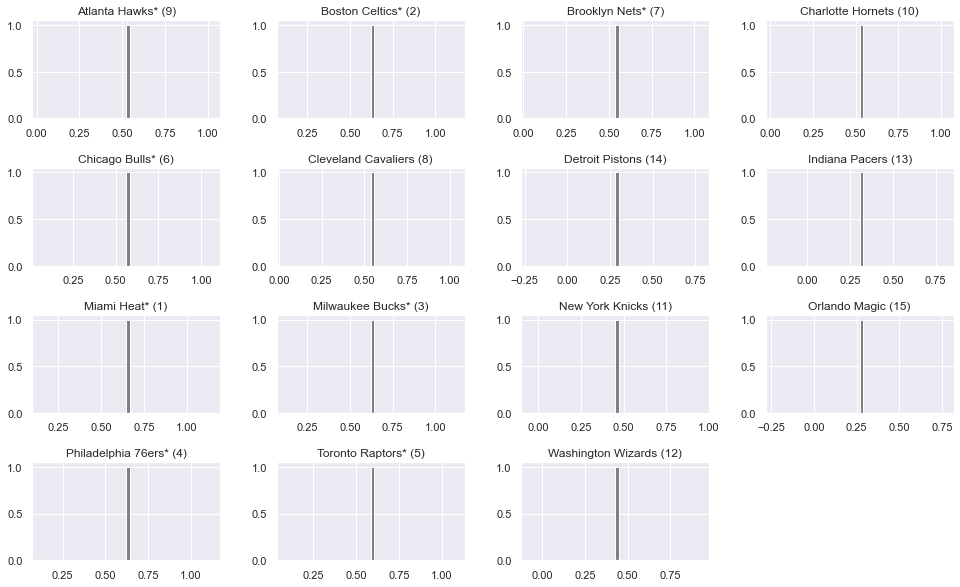

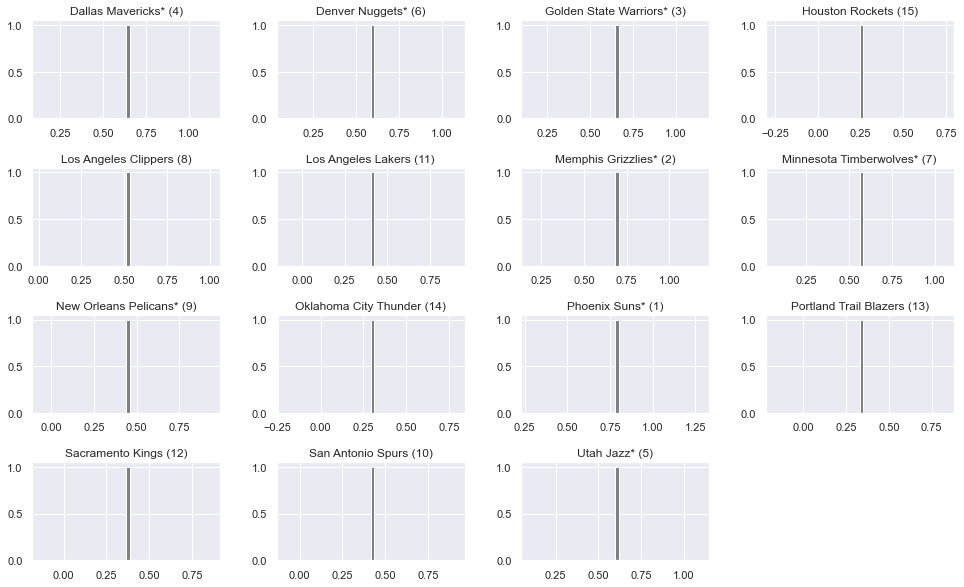

In [64]:
# Draw the distributions of all variables
axEast = ( 
    eastgamedata 
    .hist( 
        by='Eastern Conference', 
        column = 'W/L%', 
        bins=50, 
        figsize=(16, 10), 
        layout=(4, 4),  
        color='grey', 
        rot=0 
    ) 
)


axWest = ( 
    westgamedata 
    .hist( 
        by='Western Conference', 
        column = 'W/L%', 
        bins=50, 
        figsize=(16, 10), 
        layout=(4, 4),  
        color='grey', 
        rot=0 
    ) 
)

                 W         L      W/L%      PS/G      PA/G       SRS  \
W         1.000000 -1.000000  0.999997  0.584872 -0.536796  0.932840   
L        -1.000000  1.000000 -0.999997 -0.584872  0.536796 -0.932840   
W/L%      0.999997 -0.999997  1.000000  0.585026 -0.536792  0.932947   
PS/G      0.584872 -0.584872  0.585026  1.000000  0.277295  0.589709   
PA/G     -0.536796  0.536796 -0.536792  0.277295  1.000000 -0.612297   
SRS       0.932840 -0.932840  0.932947  0.589709 -0.612297  1.000000   
W/L.Mean  0.162449 -0.162449  0.162234  0.002048 -0.334325  0.277292   
W         0.931732 -0.931732  0.931796  0.455589 -0.605125  0.880795   
L        -0.931732  0.931732 -0.931796 -0.455589  0.605125 -0.880795   
W/L%      0.931886 -0.931886  0.931949  0.455722 -0.605070  0.880873   
PS/G      0.638917 -0.638917  0.638889  0.411277 -0.341298  0.626710   
PA/G     -0.787973  0.787973 -0.787730 -0.368382  0.474092 -0.700699   
SRS       0.967431 -0.967431  0.967268  0.531893 -0.546274  0.89

<AxesSubplot:>

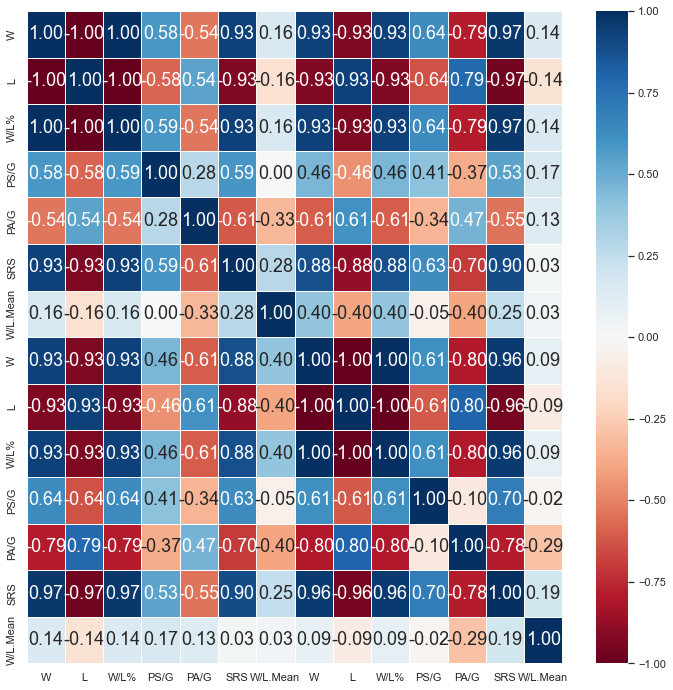

In [65]:
# Add HOMETEAM ADVANTAGE to the dataframe
allsidesgame = pd.concat([allsidesgame, game_data["HOME_TEAM_ID"]], axis = 1).reindex(allsidesgame.index)

# Correlation Matrix
print(allsidesgame.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(allsidesgame.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [66]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error
#from sklearn import metrics

#print (allsidesgame["W/L%"].shape)

#np.reshape(allsidesgame["W/L%"], 30, 1)

#print (allsidesgame["W/L%"].shape)

#X = pd.DataFrame(allsidesgame["W/L.Mean"])
#y = pd.DataFrame(allsidesgame["W/L%"])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)

In [67]:
perTeamdata = gameHTML_data[4]
perTeamdata.insert(25, "W/L.Mean", [-0.086797, 2.314554, 2.427230, -0.031088, 2.951106, 1.467836, 5.355030, 7.732240, -0.306604, 5.558962, 2.810582, 4.386214, 2.061785, 4.058824, 5.819747, -0.019560, 4.584599, 1.209716, 4.577803, 3.501163, 1.222899, 1.218599, 2.979405, 4.654857, 2.492135, -0.514778, 2.924794, 2.579247, 1.146399, 3.407834, 2.7494911], True)
perTeamdata.insert(26, "W/L%", [0.561, 0.683, 0.622, 0.524, 0.780, 0.524, 0.598, 0.415, 0.537, 0.585,
                               0.402, 0.622, 0.561, 0.305, 0.646, 0.366, 0.646, 0.622, 0.244, 0.585, 0.439, 0.427, 0.512, 0.634, 0.537, 0.451, 0.329, 0.280, 0.268, 0.293, 0.500], True)
print(perTeamdata)

      Rk                     Team   G     MP    FG   FGA    FG%    3P   3PA  \
0    1.0  Minnesota Timberwolves*  82  241.2  41.6  91.0  0.457  14.8  41.3   
1    2.0       Memphis Grizzlies*  82  241.2  43.5  94.4  0.461  11.5  32.7   
2    3.0         Milwaukee Bucks*  82  240.9  41.8  89.4  0.468  14.1  38.4   
3    4.0        Charlotte Hornets  82  242.4  42.8  91.4  0.468  13.9  38.2   
4    5.0            Phoenix Suns*  82  240.6  43.7  90.1  0.485  11.6  31.9   
5    6.0           Atlanta Hawks*  82  240.3  41.5  88.3  0.470  12.9  34.4   
6    7.0               Utah Jazz*  82  240.6  40.6  86.2  0.471  14.5  40.3   
7    8.0        San Antonio Spurs  82  241.5  43.2  92.7  0.467  11.3  32.0   
8    9.0           Brooklyn Nets*  82  240.9  42.0  88.4  0.475  11.5  31.7   
9   10.0          Denver Nuggets*  82  241.5  41.7  86.3  0.483  12.7  35.9   
10  11.0       Los Angeles Lakers  82  243.7  41.6  88.8  0.469  12.0  34.5   
11  12.0          Boston Celtics*  82  242.7  40.7  

In [68]:
teamAnalysis = pd.DataFrame(perTeamdata)

[-1.07318390e-03  6.25294403e+00  3.40939420e-02 -6.58137709e-03
 -4.11076809e-02  6.92865561e-04]
r2 socre is 0.4597921375704427
mean_sqrd_error is== 0.01125599151458733
root_mean_squared error of is== 0.10609425768903484


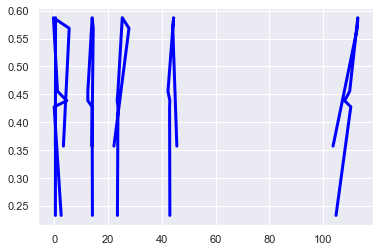

In [73]:
X = teamAnalysis[['PTS','FG%', 'TRB', 'AST', 'TOV', 'W/L.Mean']]
y = teamAnalysis['W/L%']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

y_prediction =  LR.predict(X_test)
y_prediction

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_prediction)
print('r2 socre is',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))


#plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_prediction, color="blue", linewidth=3)


[-1.25450413e-03  6.29720793e+00  3.43483838e-02 -6.46728487e-03
 -4.08242690e-02]
r2 score is 0.5228450664469511
mean_sqrd_error is== 0.009942194952627064
root_mean_squared error of is== 0.09971055587362385


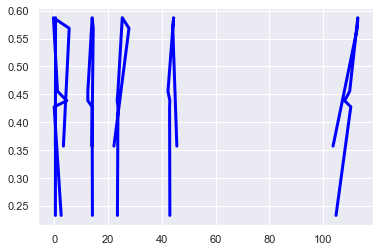

In [70]:
X2 = teamAnalysis[['PTS','FG%', 'TRB', 'AST', 'TOV']]
y2 = teamAnalysis['W/L%']

regr = linear_model.LinearRegression()
regr.fit(X2, y2)

print(regr.coef_)

# importing train_test_split from sklearn
from sklearn.model_selection import train_test_split
# splitting the data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X2_train,y2_train)

y2_prediction =  LR.predict(X2_test)
y2_prediction

# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y2_test,y2_prediction)
print('r2 score is',score)
print('mean_sqrd_error is==',mean_squared_error(y2_test,y2_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y2_test,y2_prediction)))

plt.plot(X_test, y_prediction, color="blue", linewidth=3)

We did two studies using multi variate regression as we had continuous numbers instead of binary values. One with home Court advantage and one without. Clearly as seen from the graphs plotted, there was such a minor change that it almost seems like nothing much has changed really. Furthermore, we found out that the mean squared error and root-mean-square error decreased slightly by about 0.006 and 0.003 without the implementation of home-court advantage. 

Does that mean home-court advantage is ineffective? Not really. Home court advantage on its own does have a significant impact. However, when placed alongside crucial factors, it does not become as effective. It shows that other factors weigh greater importance on the win loss of a team.



